# Keras image_dataset_from_directory()

Read a directory of images on disk and create TensorFlow Dataset.

* https://www.tensorflow.org/tutorials/load_data/images

## Get Data

In [1]:
# clone repository
!git clone https://github.com/nicholassolomon/Cats_and_Dogs.git
# move files to data directory
!mv Cats_and_Dogs/*.py .
# remove other files
!rm -rf Cats_and_Dogs

Cloning into 'Cats_and_Dogs'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 27 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 11.81 KiB | 11.81 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import download_data as dd
import os

dd.download_zip_data(
    url="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",
    path_to_data='data'
    )

for dirpath, dirnames, filenames in os.walk("data/cats_and_dogs_filtered"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


full name: cats_and_dogs_filtered.zip
name only: cats_and_dogs_filtered
data
path doesn't exist
Unzipping cats_and_dogs_filtered
There are 2 directories and 1 images in 'data/cats_and_dogs_filtered'.
There are 2 directories and 0 images in 'data/cats_and_dogs_filtered/train'.
There are 0 directories and 1000 images in 'data/cats_and_dogs_filtered/train/dogs'.
There are 0 directories and 1000 images in 'data/cats_and_dogs_filtered/train/cats'.
There are 2 directories and 0 images in 'data/cats_and_dogs_filtered/validation'.
There are 0 directories and 500 images in 'data/cats_and_dogs_filtered/validation/dogs'.
There are 0 directories and 500 images in 'data/cats_and_dogs_filtered/validation/cats'.


> The directory structure:
```
cats_and_dogs_filtered/train
...cats
......cats.0.jpg
......cats.1.jpg
...dogs
......dogs.0.jpg
......dogs.1.jpg
```


## Examine Images

Image shape: (374, 500, 3)


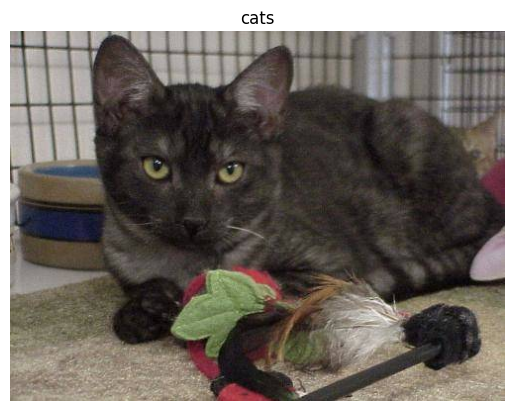

In [3]:
import model_utilities as mu

img = mu.view_random_image(target_dir='data/cats_and_dogs_filtered/train/',target_class='cats')

## Loading Data

> This particular version of cats and dogs has a training and validation directories.  I'll be using only the training for this exercise.

`tf.keras.utils.image_dataset_from_directory()`

1. Create a training set that contains both training and validation.  Will return a tuple of (training, validation) data:
 - `validation_split = 0.2`
 - 'subset = "both"`


In [4]:
#setup
import numpy as np
import tensorflow as tf
import os

In [5]:
# Data loader parameters

RANDOM_SEED=42
BATCH_SIZE=32          # number of images per batch
IMAGE_SHAPE=(150,150)  # height, width

train_dir = '/content/data/cats_and_dogs_filtered/train'


In [6]:
# create training set and validation set
(train_ds, validation_ds) = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir,
    labels = 'inferred',
    class_names = ['cats','dogs'],
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SHAPE,
    seed = RANDOM_SEED,
    validation_split=0.2,
    subset = 'both'
)

# show number of batches each dataset
len(train_ds), len(validation_ds)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


(50, 13)

In [7]:
# show classes
class_names = train_ds.class_names
class_names

['cats', 'dogs']

### Get info on dataset batches

> returns for images: (32, 150, 150, 3) and labels: (32,)

* images contains 32 images with each having a shape of 150 height, 150 width and 3 color channels (RGB). Labels has 32 scalar tensors.

In [8]:
# iterate over images in batches
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break



(32, 150, 150, 3)
(32,)


In [9]:
# one image tensor
image_batch[1]

<tf.Tensor: shape=(150, 150, 3), dtype=float32, numpy=
array([[[253.41112 , 255.      , 254.66667 ],
        [235.54666 , 229.54666 , 226.54666 ],
        [217.59555 , 194.8689  , 190.77779 ],
        ...,
        [169.8022  ,  47.311226,  42.5556  ],
        [191.13333 ,  40.273335,  48.226665],
        [180.07556 ,  34.075565,  44.984444]],

       [[253.63333 , 255.      , 254.13333 ],
        [237.28    , 232.78    , 229.28    ],
        [219.72    , 201.      , 195.36    ],
        ...,
        [182.00667 ,  39.813328,  43.92    ],
        [180.48    ,  39.04    ,  44.9     ],
        [180.53333 ,  35.233326,  42.919945]],

       [[253.55556 , 253.38889 , 253.05556 ],
        [241.96666 , 237.46666 , 233.96666 ],
        [216.35556 , 201.48889 , 194.65555 ],
        ...,
        [192.16672 ,  32.788864,  43.133312],
        [177.96666 ,  41.966667,  45.966667],
        [184.13329 ,  39.133293,  42.577724]],

       ...,

       [[164.27786 ,  71.411224,  80.0112  ],
        [149.

In [10]:
# as numpy ndarray
image_batch[1].numpy()

array([[[253.41112 , 255.      , 254.66667 ],
        [235.54666 , 229.54666 , 226.54666 ],
        [217.59555 , 194.8689  , 190.77779 ],
        ...,
        [169.8022  ,  47.311226,  42.5556  ],
        [191.13333 ,  40.273335,  48.226665],
        [180.07556 ,  34.075565,  44.984444]],

       [[253.63333 , 255.      , 254.13333 ],
        [237.28    , 232.78    , 229.28    ],
        [219.72    , 201.      , 195.36    ],
        ...,
        [182.00667 ,  39.813328,  43.92    ],
        [180.48    ,  39.04    ,  44.9     ],
        [180.53333 ,  35.233326,  42.919945]],

       [[253.55556 , 253.38889 , 253.05556 ],
        [241.96666 , 237.46666 , 233.96666 ],
        [216.35556 , 201.48889 , 194.65555 ],
        ...,
        [192.16672 ,  32.788864,  43.133312],
        [177.96666 ,  41.966667,  45.966667],
        [184.13329 ,  39.133293,  42.577724]],

       ...,

       [[164.27786 ,  71.411224,  80.0112  ],
        [149.06674 ,  54.73343 ,  64.06674 ],
        [126.23338 ,  

## Visualize Dataset Images

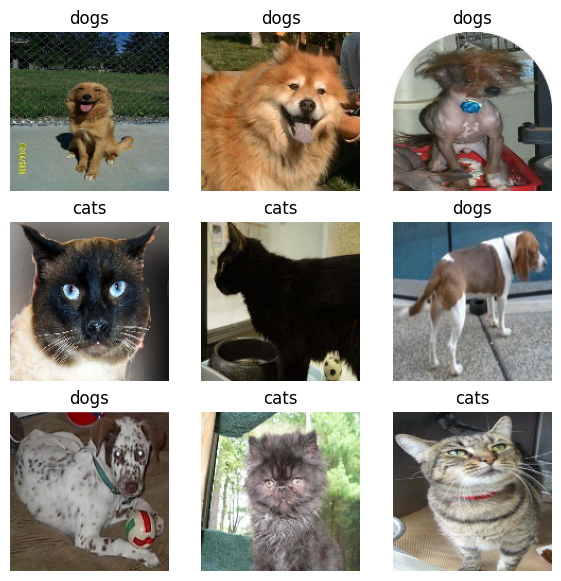

In [11]:
import matplotlib.pyplot as plt

def show_random_dataset_images(tf_dataset, num_images=9):
  plt.figure(figsize=(7,7))
  for images, labels in tf_dataset.take(1):
    for i in range(num_images):
      ax = plt.subplot(3,3,i+1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

show_random_dataset_images(train_ds)

## Standardize and Normalize Dataset

> https://www.tensorflow.org/guide/keras/preprocessing_layers

> Can be done as part of the model (one of the layers) or done in pre-processing. But as the above TF notebook states, doing preprocessing inside the model at inference time "makes your model portable and helps reduce the training/serving skew."

* RGB are between 0 and 255.  Normalize to between 0 and 1.

In [12]:
# min and max
print(f"Max: {image_batch[1].numpy().max()} Min: {image_batch[1].numpy().min()}")

Max: 255.0 Min: 2.3333358764648438


In [13]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

# use .map() to apply to training set
train_norm_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_norm_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))

In [14]:
# iterate over images in batches
for image_norm_batch, labels_norm_batch in train_norm_ds:
  print(image_norm_batch.shape)
  print(labels_norm_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [15]:
# view normalized values (between 0 and 1)
image_norm_batch[1]

<tf.Tensor: shape=(150, 150, 3), dtype=float32, numpy=
array([[[0.11067539, 0.11198258, 0.07995643],
        [0.24619609, 0.20698039, 0.15011765],
        [0.2547451 , 0.1823704 , 0.11256647],
        ...,
        [0.24429733, 0.18285933, 0.18612735],
        [0.12007844, 0.08478432, 0.07694118],
        [0.16078432, 0.13333334, 0.10980393]],

       [[0.11636602, 0.11440524, 0.08237909],
        [0.15537256, 0.11615688, 0.06415687],
        [0.25450984, 0.18771243, 0.12669282],
        ...,
        [0.23035327, 0.16891527, 0.17218328],
        [0.12792157, 0.09262746, 0.08478432],
        [0.16658825, 0.13725491, 0.11466667]],

       [[0.11010894, 0.09769064, 0.06893247],
        [0.16039217, 0.12366014, 0.08431373],
        [0.24457516, 0.18793029, 0.14270152],
        ...,
        [0.19664487, 0.13520688, 0.1384749 ],
        [0.1550327 , 0.11973857, 0.11189543],
        [0.17254902, 0.13725491, 0.11189543]],

       ...,

       [[0.25886714, 0.17568628, 0.09498898],
        [0.25

## TensorFlow Dataset Performance Optimization

* `Dataset.cache`: avoid I/O blocking by keeping images in memory during epoch.
* `Datset.prefetch`: allows data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_norm_ds = train_norm_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_norm_ds = validation_norm_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Train Model

Epoch 1/100
50/50 - 2s - loss: 0.7117 - accuracy: 0.5263 - val_loss: 0.6589 - val_accuracy: 0.5675 - 2s/epoch - 43ms/step
Epoch 2/100
50/50 - 1s - loss: 0.6841 - accuracy: 0.5838 - val_loss: 0.6105 - val_accuracy: 0.6075 - 741ms/epoch - 15ms/step
Epoch 3/100
50/50 - 1s - loss: 0.6405 - accuracy: 0.6331 - val_loss: 0.5551 - val_accuracy: 0.6775 - 737ms/epoch - 15ms/step
Epoch 4/100
50/50 - 1s - loss: 0.6002 - accuracy: 0.6750 - val_loss: 0.5228 - val_accuracy: 0.7075 - 740ms/epoch - 15ms/step
Epoch 5/100
50/50 - 1s - loss: 0.5512 - accuracy: 0.7194 - val_loss: 0.5157 - val_accuracy: 0.7125 - 741ms/epoch - 15ms/step
Epoch 6/100
50/50 - 1s - loss: 0.4936 - accuracy: 0.7644 - val_loss: 0.5049 - val_accuracy: 0.7350 - 736ms/epoch - 15ms/step
Epoch 7/100
50/50 - 1s - loss: 0.4460 - accuracy: 0.7756 - val_loss: 0.5214 - val_accuracy: 0.7225 - 742ms/epoch - 15ms/step
Epoch 8/100
50/50 - 1s - loss: 0.3963 - accuracy: 0.8238 - val_loss: 0.5214 - val_accuracy: 0.7200 - 739ms/epoch - 15ms/step
Epo

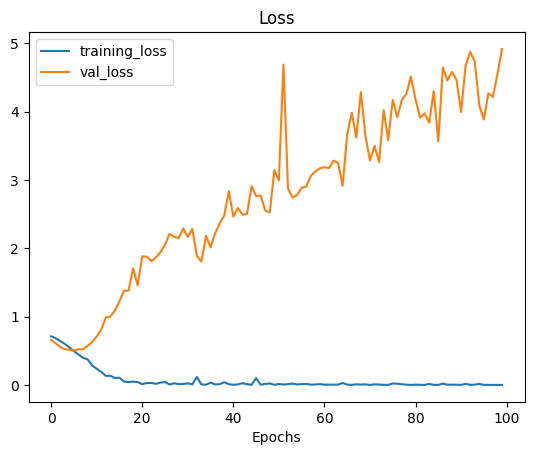

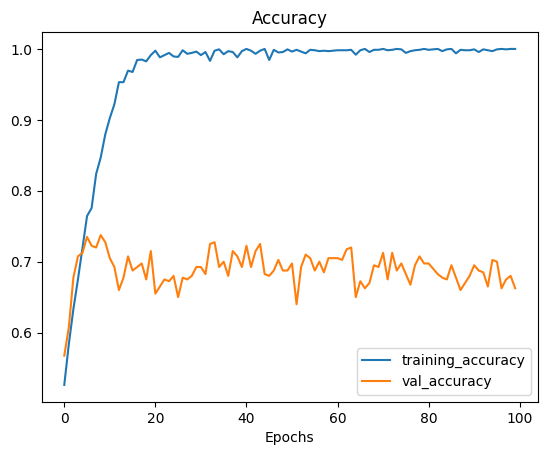

In [19]:
# create model
import build_tf_model as btfm
import tf_train as tt
import model_utilities as mu

RANDOM_SEED = 42
RUN_EPOCHS = 100

model = btfm.build_model(RANDOM_SEED)

history = tt.tf_model_training(
    model=model,
    ds_train = train_norm_ds,
    ds_validation = validation_norm_ds,
    epochs=RUN_EPOCHS
)

# plot loss curves
mu.tf_plot_loss_curves(history)


